In [53]:
# Importing core libraries
import numpy as np
import pandas as pd
from time import time
import pprint
import joblib
from imblearn.over_sampling import ADASYN

# Model selection
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer

# Data transformation pipelines
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, PReLU
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import keras
import tensorflow as tf
from keras import backend as K
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model

In [54]:
# Importing from Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FactorAnalysis

from keras.layers import Input, Embedding, Reshape, GlobalAveragePooling1D
from keras.layers import Flatten, concatenate, Concatenate, Lambda, Dropout, SpatialDropout1D
from keras.layers import Activation, LeakyReLU
from keras.models import Model, load_model
from keras.losses import binary_crossentropy

In [55]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [204]:
df = pd.read_csv('data/CVD_data.csv')
pd.set_option('display.max_columns', None)
df.drop('Unnamed: 0', axis=1, inplace=True)
df

30850-0.0  30780-0.0  30690-0.0  30790-0.0  23101-0.0  23099-0.0  \
0        0.50800    3.88800    6.47700    65.1984       45.2       35.6   
1       13.08800    3.52000    5.51200    15.4000       74.6       36.5   
2        9.73364    4.10892    6.47949    50.8588       71.7       29.7   
3        1.78800    2.88700    5.56500    56.5183       40.2       29.8   
4        0.75600    2.67000    4.68000     4.7700       46.5       30.1   
...          ...        ...        ...        ...        ...        ...   
86950    1.09949    3.87500    6.19000   169.2000       46.9       35.8   
86951    9.03600    2.46700    4.03500    44.6578       66.3       36.9   
86952    0.48500    3.80200    6.50700    45.3675       41.6       37.1   
86953    0.72500    2.86300    4.66400     5.0900       44.9       46.3   
86954   12.04000    3.35800    5.18400    43.3653       68.1       25.7   

       48-0.0  23100-0.0  30710-0.0  30760-0.0  30640-0.0  30750-0.0  49-0.0  \
0        74.0       25.0       0.34    1.70600    1.21100     35.065   102.0   
1       120.0       42.9       3.94    1.17300    1.01900     40.900   113.0   
2       112.0       30.3       3.88    1.58546    1.22432     84.100   107.0   
3        67.0       17.0       0.87    2.11500    0.81000     36.400    91.0   
4        85.0       20.0       0.18    1.49300    0.73300     34.200   105.0   
...       ...        ...        ...        ...        ...        ...     ...   
86950    94.0       26.2       3.83    1.00800    1.30600     24.500   109.0   
86951   114.0       38.7       2.24    1.08700    0.77300     32.100   110.0   
86952    82.0       24.5       0.52    1.85700    0.96900     32.800   106.0   
86953   102.0       38.7       2.75    1.15900    0.89800     33.200   110.0   
86954    99.0       23.6       0.85    1.04300    0.98500     31.500    98.0   

       30770-0.0  30740-0.0  30630-0.0  30870-0.0  21001-0.0  1488-0.0  \
0         26.339    5.62200    1.59300    0.97700    24.5790       6.0   
1         10.701    5.05200    1.39000    2.35800    35.0861       2.0   
2         18.763   13.71763    1.74423    2.78764    30.7934       0.0   
3         31.672    4.82700    1.89100    1.15700    20.7577       0.0   
4         42.209    5.06300    1.86900    1.67700    25.9766       7.0   
...          ...        ...        ...        ...        ...       ...   
86950     16.010    4.60400    1.42100    5.14200    29.2822       0.0   
86951     22.351    3.79600    1.18800    1.01200    34.2857       0.0   
86952     21.654    5.03400    2.14200    2.15200    26.1461       4.0   
86953     23.647    5.67300    1.36500    2.13400    31.4652       0.0   
86954     22.507    4.85100    1.24100    2.54700    28.6196      20.0   

       4079-0.0  1299-0.0  21003-0.0  1160-0.0  1438-0.0  4080-0.0  1458-0.0  \
0          77.0      10.0       54.0       7.0      10.0     110.0      3.73   
1          91.0       2.0       65.0       9.0      12.0     166.0      7.00   
2          99.0       2.0       55.0       7.0      10.0     135.0      7.00   
3          71.0       5.0       49.0       8.0      14.0     116.0      5.00   
4          73.0       4.0       61.0       7.0       2.0     113.0      7.00   
...         ...       ...        ...       ...       ...       ...       ...   
86950      82.0       3.0       68.0       7.0       8.0     151.0      5.00   
86951      90.0       1.0       58.0       5.0      26.0     129.0      1.00   
86952      69.0       3.0       57.0       8.0       7.0     140.0      7.00   
86953      73.0       3.0       64.0       6.0       4.0     148.0      7.00   
86954      81.0       2.0       43.0       7.0      20.0     133.0     10.00   

       1528-0.0  1319-0.0  845-0.0  1289-0.0  1309-0.0  1418-0.0  1329-0.0  \
0           2.0       0.0    23.52       6.0       2.0         3         2   
1           2.4       0.0    16.00       2.0       1.0         2         2   
2           2.0       0.0    21.00       3.0       1.0       

In [205]:
outcomes = ['outcome_myocardial_infarction','outcome_cardiomyopathies','outcome_ischemic_heart_disease','outcome_heart_failure','outcome_peripheral_vascular_disease','outcome_cardiac_arrest','outcome_cerebral_infarction','outcome_arrhythmia']

# classifying features by datatype for appropriate use in model
continuous_cols = df.iloc[:,:18].columns.to_list()
numerical_cols = df.iloc[:,18:18+13].columns.to_list()
categorical_cols = df.iloc[:,18+13:18+13+30].columns.to_list() # ordinal encoded
nominal_cats = ['1428-0.0','20117-0.0','2100-0.0','2654-0.0','21000-0.0','1538-0.0','31-0.0','6138-0.0','2090-0.0','1508-0.0','6142-0.0','1468-0.0','1239-0.0','1448-0.0','hypertension']

In [206]:
# test train split
X = df.iloc[:,:61]
y = df[outcomes[-1]]

### transform numeric features

In [228]:
def process_features(data, target, norm_method, one_hot=True):
    
    # split data into features and target 
    X = data.iloc[:,:61]
    y = data[target]
    
    # split into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)
    
    # scale numerical features
    scaler = norm_method # QuantileTransformer(output_distribution='uniform'), StandardScaler(), MaxMinScaler()
    X_train[continuous_cols+numerical_cols]=scaler.fit_transform(X_train[continuous_cols+numerical_cols])
    X_test[continuous_cols+numerical_cols] = scaler.transform(X_test[continuous_cols+numerical_cols])
    
    # get_dummies on nominal categorical features & drop original cols
    if one_hot:
        join = pd.concat([X_train,X_test],axis=0)
        dummies = pd.get_dummies(join[nominal_cats], columns=nominal_cats, drop_first=True)
        X_train[dummies.columns] = dummies.iloc[:len(X_train),:]
        X_test[dummies.columns] = dummies.iloc[len(X_train):,:]
        X_test = X_test.reindex(columns = X_train.columns, fill_value=0)
        del(dummies)

        X_train.drop(nominal_cats,axis=1,inplace=True)
        X_test.drop(nominal_cats,axis=1,inplace=True)

        X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.15, random_state=1)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [184]:
scaler  = StandardScaler()
X[continuous_cols+numerical_cols]=scaler.fit_transform(X[continuous_cols+numerical_cols])

In [222]:
# # drop features with low variance
# X_nums = X_train[continuous_cols+numerical_cols]
# X_nums = X_nums.loc[:,X_nums.var()>0.05]

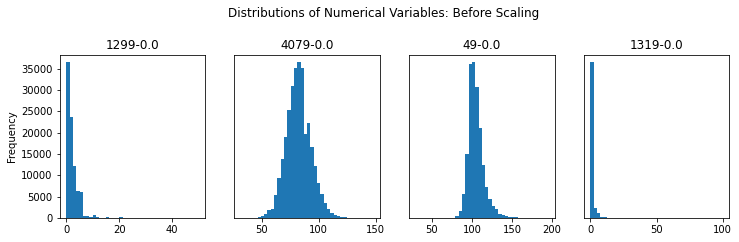

In [125]:
test_features = ['1299-0.0', '4079-0.0', '49-0.0', '1319-0.0']

fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(nrows=1, ncols=4, figsize = (12,3))
plt.suptitle('Distributions of Numerical Variables: Before Scaling', fontsize=12, y=1.1)

X[test_features[0]].plot(ax=ax1, kind='hist', bins=40, color='tab:blue').set_title(test_features[0])
X[test_features[1]].plot(ax=ax2, kind='hist', bins=40, color='tab:blue').set_title(test_features[1])
X[test_features[2]].plot(ax=ax3, kind='hist', bins=40,color='tab:blue').set_title(test_features[2])
X[test_features[3]].plot(ax=ax4, kind='hist', bins=40,color='tab:blue').set_title(test_features[3])

ax2.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

In [190]:
# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

### transform categorical features

In [191]:
# get_dummies on nominal categorical features & drop original cols
join = pd.concat([X_train,X_test],axis=0)
dummies = pd.get_dummies(join[nominal_cats], columns=nominal_cats, drop_first=True)
X_train[dummies.columns] = dummies.iloc[:len(X_train),:]
X_test[dummies.columns] = dummies.iloc[len(X_train):,:]
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)
del(dummies)

X_train.drop(nominal_cats,axis=1,inplace=True)
X_test.drop(nominal_cats,axis=1,inplace=True)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
X_test

30850-0.0  30780-0.0  30690-0.0  30790-0.0  23101-0.0  23099-0.0  \
69564   0.929152   0.538539   0.587722   0.374595   0.689189   0.098599   
69565   0.060811   0.815816   0.815816   0.316517   0.046547   0.599099   
69566   0.319032   0.270938   0.296296   0.851601   0.128128   0.843343   
69567   0.935324   0.075676   0.133934   0.811887   0.368869   0.076577   
69568   0.109610   0.575909   0.598599   0.299299   0.077578   0.768268   
...          ...        ...        ...        ...        ...        ...   
86950   0.220966   0.732669   0.734067   0.972100   0.257257   0.716717   
86951   0.521580   0.176844   0.138539   0.592962   0.763764   0.748749   
86952   0.023423   0.704455   0.830581   0.601626   0.105105   0.754755   
86953   0.077792   0.318819   0.291543   0.050717   0.202202   0.952953   
86954   0.741581   0.501168   0.438772   0.577185   0.812813   0.291291   

         48-0.0  23100-0.0  30710-0.0  30760-0.0  30640-0.0  30750-0.0  \
69564  0.283784   0.145145   0.225726   0.734735   0.515015   0.546547   
69565  0.084084   0.248749   0.661662   0.630631   0.746747   0.653153   
69566  0.547047   0.677177   0.338338   0.778779   0.152653   0.733684   
69567  0.096597   0.057057   0.014515   0.855567   0.029363   0.887888   
69568  0.072573   0.504004   0.347347   0.717718   0.504505   0.265265   
...         ...        ...        ...        ...        ...        ...   
86950  0.454454   0.575075   0.778779   0.150150   0.896396   0.003128   
86951  0.905405   0.892392   0.598599   0.227227   0.186687   0.118118   
86952  0.155656   0.504004   0.122122   0.889556   0.464464   0.158659   
86953  0.691692   0.892392   0.672673   0.305305   0.362863   0.184685   
86954  0.609610   0.464464   0.246246   0.182182   0.487988   0.092593   

         49-0.0  30770-0.0  30740-0.0  30630-0.0  30870-0.0  21001-0.0  \
69564  0.455956   0.374374   0.328576   0.730731   0.525020   0.092626   
69565  0.051051   0.714649   0.895805   0.666667   0.761512   0.329046   
69566  0.305305   0.882731   0.194194   0.774858   0.100440   0.424765   
69567  0.051051   0.446529   0.626627   0.794955   0.033033   0.098534   
69568  0.014014   0.737443   0.122456   0.645646   0.407780   0.239686   
...         ...        ...        ...        ...        ...        ...   
86950  0.723724   0.205382   0.190190   0.401401   0.983298   0.611612   
86951  0.757257   0.659808   0.017210   0.105105   0.161503   0.873412   
86952  0.602603   0.607774   0.502922   0.977455   0.709150   0.330854   
86953  0.757257   0.743204   0.817857   0.320320   0.703704   0.757234   
86954  0.217718   0.670740   0.344344   0.160160   0.807808   0.554958   

       1488-0.0  4079-0.0  1299-0.0  21003-0.0  1160-0.0  1438-0.0  4080-0.0  \
69564  0.600100  0.185185  0.682683   0.820821  0.438939  0.855856  0.411912   
69565  0.600100  0.488488  0.566066   0.681181  0.168168  0.687688  0.477978   
69566  0.290290  0.302302  0.566066   0.751752  0.168168  0.058559  0.711712   
69567  0.678679  0.072072  0.869369   0.955956  0.754755  0.092593  0.500501   
69568  0.736737  0.646647  0.977477   0.217718  0.438939  0.288288  0.101602   
...         ...       ...       ...        ...       ...       ...       ...   
86950  0.000000  0.488488  0.763263   0.888889  0.438939  0.288288  0.675175   
86951  0.000000  0.776276  0.270771   0.279780  0.044545  0.906406  0.221722   
86952  0.600100  0.102102  0.763263   0.247247  0.754755  0.238238  0.433433   
86953  0.000000  0.185185  0.763263   0.612112  0.168168  0.092593  0.611111   
86954  0.996997  0.449449  0.566066   0.017017  0.438939  0.799800  0.292793   

       1458-0.0  1528-0.0  1319-0.0   845-0.0  1289-0.0  1309-0.0  1418-0.0  \
69564  0.790290  0.409910  0.924925  0.751251  0.619119  0.486987         2   
69565  0.565065  0.781782  0.000000  0.169169  0.820320  0.734234         3   
69566  0.790290  0.409910  0.703203  0.910410  0.092593  0.486987         2   
69567  0.151652  0.639139  0.000000  0.004004  0.31

### Resampling on training data to address class imbalance

In [229]:
from imblearn.over_sampling import ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def resample_data(X_train, y_train, method):
    
    if method=='ADASYN':
        X_temp,y_train= ADASYN().fit_resample(X_train,y_train)
        X_train = pd.DataFrame(X_temp, columns=X_train.columns)
        
    elif method=='over':
        oversample = RandomOverSampler(sampling_strategy='minority',random_state=1)
        X_temp, y_train = oversample.fit_resample(X_train, y_train)
        X_train = pd.DataFrame(X_temp, columns=X_train.columns)

    elif method=='under':
        # another method: under sample the majority case in train
        undersample = RandomUnderSampler(sampling_strategy='majority',random_state=1)
        X_temp, y_train = undersample.fit_resample(X_train, y_train)
        X_train = pd.DataFrame(X_temp, columns=X_train.columns)
        
    elif method=='partial_under':
        # under sample the majority case in train, about 2:1 neg to pos ratio
        undersample_uneven = RandomUnderSampler(sampling_strategy=0.5,random_state=1)
        X_temp, y_train = undersample_uneven.fit_resample(X_train, y_train)
        X_train = pd.DataFrame(X_temp, columns=X_train2.columns)
        
    return X_train, y_train

In [192]:
X_train, y_train = resample_data(X_train, y_train, 'over')

### Build MLP Model

#### define model metrics

In [112]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def gelu(x):
    """Gaussian Error Linear Unit.
    Args:
        x: float Tensor to perform activation.
    Returns:
        `x` with the GELU activation applied.
    """
    cdf = 0.5 * (1.0 + tf.tanh(
        (np.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3)))))
    return x * cdf

#### optimize number of nodes

In [223]:
def evaluate_model(n_nodes, X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch):
    
    # define model
    model = Sequential()
    model.add(Dense(n_nodes, activation=tf.keras.activations.gelu , input_shape=(X_train.shape[1],)))
    model.add(Dense(150, activation=tf.keras.activations.gelu ))
    model.add(Dense(150, activation=tf.keras.activations.gelu ))
    model.add(Dense(1, activation=tf.nn.sigmoid))
    
    # compile model
    model.compile(
        loss="binary_crossentropy",
        optimizer=Adam(learning_rate=0.000001),
        metrics=['acc',f1_m,precision_m, recall_m])

    # fit model on train set
    history = model.fit(
        X_train, y_train,
        batch_size=batch,
        epochs=epochs,
        shuffle=True,
        verbose=1,
        validation_data=(X_val, y_val),
    )
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return history, test_acc

In [224]:
def plot_history(history):
    fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

    ax1.set_title("Loss")
    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["Test Loss", "Validation Loss"])
    ax1.set_xlabel ("Epoch")

    ax2.set_title("Accuracy")
    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["Test Accuracy", "Validation Accuracy"])
    ax2.set_xlabel ("Epoch")

    ax3.set_title("Recall")
    ax3.plot(history.history["recall_m"])
    ax3.plot(history.history["val_recall_m"])
    ax3.legend(["Test Recall", "Validation Recall"])
    ax3.set_xlabel ("Epoch")

    ax4.set_title("F1")
    ax4.plot(history.history["f1_m"])
    ax4.plot(history.history["val_f1_m"])
    ax4.legend(["Test F1-score", "Validation F1-score"])
    ax4.set_xlabel ("Epoch")

#### test range of input nodes

In [230]:
num_nodes = [10, 25, 50, 100, 150, 200]
epochs = 400
batch = 500

X_train, X_val, X_test, y_train, y_val, y_test = process_features(df, 'outcome_arrhythmia', QuantileTransformer(output_distribution='uniform'), one_hot=True)
X_train, y_train= resample_data(X_train, y_train, 'under')

for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history, result = evaluate_model(n_nodes, X_train, X_val, y_val, y_train, X_test, y_test, epochs, batch)
    
    # summarize final test set accuracy
    print('nodes=%d: %.3f' % (n_nodes, result))
    
    # plot learning curves
    plot_history(history)

Epoch 1/400
112/112 [==============================] - 7s 46ms/step - loss: 0.6947 - acc: 0.4910 - f1_m: 0.6033 - precision_m: 0.4940 - recall_m: 0.7761 - val_loss: 0.6937 - val_acc: 0.5067 - val_f1_m: 0.6203 - val_precision_m: 0.5218 - val_recall_m: 0.7660
Epoch 2/400
112/112 [==============================] - 2s 14ms/step - loss: 0.6945 - acc: 0.4920 - f1_m: 0.5999 - precision_m: 0.4955 - recall_m: 0.7613 - val_loss: 0.6936 - val_acc: 0.5042 - val_f1_m: 0.6131 - val_precision_m: 0.5205 - val_recall_m: 0.7469
Epoch 3/400
112/112 [==============================] - 2s 17ms/step - loss: 0.6944 - acc: 0.4924 - f1_m: 0.5932 - precision_m: 0.4945 - recall_m: 0.7419 - val_loss: 0.6936 - val_acc: 0.5039 - val_f1_m: 0.6078 - val_precision_m: 0.5208 - val_recall_m: 0.7310
Epoch 4/400
 99/112 [=========================>....] - ETA: 0s - loss: 0.6942 - acc: 0.4925 - f1_m: 0.5894 - precision_m: 0.4948 - recall_m: 0.7300

KeyboardInterrupt: 

In [ ]:
# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(no_classes, activation='softmax'))

    # Compile the model
    model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

### Save Model